In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("online_retail_II.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# Exploration of Dataset

**Checking infomation in the dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


**Checking the statistical information of the dataset**

In [5]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


**Conversion of invoice date to 'datetime' data type**

In [6]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceDate"].head()

0   2009-12-01 07:45:00
1   2009-12-01 07:45:00
2   2009-12-01 07:45:00
3   2009-12-01 07:45:00
4   2009-12-01 07:45:00
Name: InvoiceDate, dtype: datetime64[ns]

**Conversion of 'Invoice' column to numeric data**

In [7]:
df["Invoice"] = pd.to_numeric(df["Invoice"], errors="coerce")
df["Invoice"].head()

0    489434.0
1    489434.0
2    489434.0
3    489434.0
4    489434.0
Name: Invoice, dtype: float64

**Checking of StockCode values that end with alphabet**

In [8]:
df["StockCode"].astype(str)
(df[df["StockCode"].str.match("^\\d{5}$")==False])[:5]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434.0,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434.0,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436.0,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436.0,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436.0,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom


# Cleaning of Dataset

The dataset contains volume of customers information from different countries. We are going to subset country with highest customers (United Kingdom) from the entire dataset and subject it to cleaning processes.

**Subset United Kingdom from the country column**

In [9]:
uk_df = df[df["Country"]=="United Kingdom"]
uk_df[:5]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434.0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434.0,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434.0,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434.0,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434.0,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


**Statistical information of customers from United Kingdom**

In [10]:
uk_df.describe()

,Invoice,Quantity,InvoiceDate,Price,Customer ID
count,964674.000000,981330.000000,981330,981330.000000,741301.000000
mean,537441.505217,8.858259,2011-01-01 09:04:09.776283136,4.537892,15554.046300
min,489434.000000,-80995.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,515012.000000,1.000000,2010-07-07 11:25:00,1.250000,14203.000000
50%,537435.000000,3.000000,2010-12-06 16:57:00,2.100000,15551.000000
75%,560807.000000,10.000000,2011-07-20 16:17:00,4.150000,16936.000000
max,581586.000000,80995.000000,2011-12-09 12:49:00,38970.000000,18287.000000
std,26719.143590,172.638944,NaN,126.743401,1594.076188


Anomaly is discovered from the information displayed up above. In the United Kingdom Dataframe, the 'Quantity' column has some negative figures which is not appropriate. Therefore, we need to remove all values with negative figures.

**showing United Kingdom dataframe with negative quantity values**

In [12]:
uk_neg_qty_df = uk_df[uk_df["Quantity"]<0]
uk_neg_qty_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
196,NaN,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
197,NaN,90200D,PINK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
198,NaN,90200B,BLACK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
199,NaN,90200E,GREEN SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
200,NaN,90200C,BLUE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


**Removal of values with negative figures**

In [6]:
uk_non_neg_qty_df = uk_df[uk_df["Quantity"]>=0]
uk_non_neg_qty_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


**Statistical information of United Kingdom dataset with 'Quantity' column without negative values**

In [7]:
uk_non_neg_qty_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,961224.000000,961224,961224.000000,725296.000000
mean,10.022887,2011-01-02 01:33:54.080484352,3.844994,15559.070450
min,1.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-07-08 11:59:00,1.250000,14209.000000
50%,3.000000,2010-12-07 10:32:00,2.100000,15555.000000
75%,10.000000,2011-07-21 12:33:00,4.130000,16938.000000
max,80995.000000,2011-12-09 12:49:00,25111.090000,18287.000000
std,125.971603,NaN,97.144338,1593.863296


Also from the exploratory analysis, I discovered that there are some customers in the United Kingdom dataframe without customer ID. We need to fetch them out and consequently remove them from the dataset. 

**Fetching out observations in the United Kingdom Dataframe without customer ID**

In [8]:
uk_customerID_NaN_df = uk_non_neg_qty_df[uk_non_neg_qty_df["Customer ID"].isna()] 
uk_customerID_NaN_df[:5]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom


From the information below, we have over 230,000 observations that have empty customer ID. So, we need to remove all these observations from the United Kingdom dataset alongside negative 'Quantity' values, so that we can have our clean dataset. 

In [9]:
uk_customerID_NaN_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235928 entries, 577 to 1067001
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      235928 non-null  object        
 1   StockCode    235928 non-null  object        
 2   Description  234235 non-null  object        
 3   Quantity     235928 non-null  int64         
 4   InvoiceDate  235928 non-null  datetime64[ns]
 5   Price        235928 non-null  float64       
 6   Customer ID  0 non-null       float64       
 7   Country      235928 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 16.2+ MB


**Removal of observations without customer ID from the United Kingdom dataframe without negative quantity values**

In [10]:
cleaned_uk_df = uk_non_neg_qty_df[(~uk_non_neg_qty_df.index.isin(uk_customerID_NaN_df.index))]
cleaned_uk_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Now that we have cleaned United Kingdom dataset, let's see the statistical information embedded in it.

In [11]:
cleaned_uk_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,725296.000000,725296,725296.000000,725296.000000
mean,12.021055,2010-12-31 09:07:02.188237568,3.056583,15559.070450
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-07-04 14:27:00,1.250000,14209.000000
50%,4.000000,2010-12-02 12:33:00,1.950000,15555.000000
75%,12.000000,2011-07-26 11:38:00,3.750000,16938.000000
max,80995.000000,2011-12-09 12:49:00,10953.500000,18287.000000
std,141.560253,NaN,25.164725,1593.863296


**Record of data lost during cleaning**

In [12]:
round(len(cleaned_uk_df) / len(df), 2)

0.68

About 32% of data was lost during cleaning

# Feature Engineering

**Create 'SaleLineTotal' Column to show sales per unit quantity**

In [13]:
cleaned_uk_df["SaleLineTotal"] = cleaned_uk_df["Quantity"] * cleaned_uk_df["Price"]
cleaned_uk_df["SaleLineTotal"][:5]

C:\Users\USER\AppData\Local\Temp\ipykernel_3940\141246712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_uk_df["SaleLineTotal"] = cleaned_uk_df["Quantity"] * cleaned_uk_df["Price"]


0     83.4
1     81.0
2     81.0
3    100.8
4     30.0
Name: SaleLineTotal, dtype: float64

Now, we are going to create new columns alongside **'MonetaryValue'** and these are **'Frequency'** and **'Recency'** columns. The frequency column will show the rate at which a customer patronize the business while the recency column will shed light on the last time a customer had purchashed.

**Creation of 'aggregated_df' that will contain MonetaryValue, Frequency, and eventually Recency columns**

In [14]:
aggregated_df = cleaned_uk_df.groupby("Customer ID", as_index=False)\
.agg(
    MonetaryValue = ("SaleLineTotal", "sum"),
    Frequency = ("Invoice", "nunique"),
    LastInvoiceDate = ("InvoiceDate", "max")
)
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,77556.46,12,2011-01-18 10:01:00
1,12608.0,415.79,1,2010-10-31 10:49:00
2,12745.0,723.85,2,2010-08-10 10:14:00
3,12746.0,254.55,1,2010-06-17 10:41:00
4,12747.0,9276.54,26,2011-12-07 14:34:00


**Determine most recent date of item purchase, from the invoice**

In [15]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()
max_invoice_date

Timestamp('2011-12-09 12:49:00')

**Creating a 'Recency' column in days, that will show the last time a customer has purchased**

In [16]:
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,77556.46,12,2011-01-18 10:01:00,325
1,12608.0,415.79,1,2010-10-31 10:49:00,404
2,12745.0,723.85,2,2010-08-10 10:14:00,486
3,12746.0,254.55,1,2010-06-17 10:41:00,540
4,12747.0,9276.54,26,2011-12-07 14:34:00,1


**Let look out for outliers in our dataset**

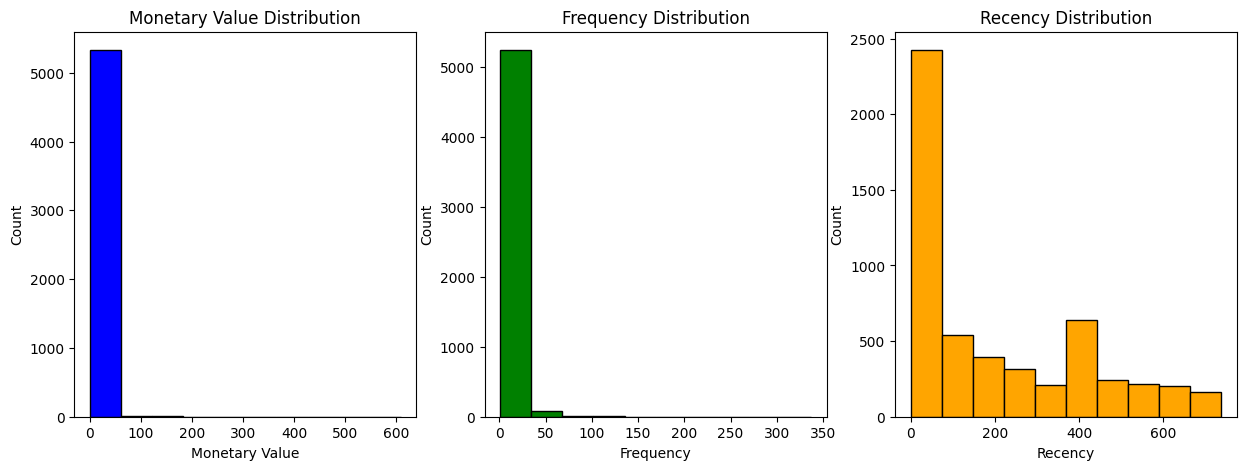

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df["MonetaryValue"] / 1e3, bins=10, color="blue", edgecolor="black")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
plt.hist(aggregated_df["Frequency"], bins=10, color="green", edgecolor="black")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
plt.hist(aggregated_df["Recency"], bins=10, color="orange", edgecolor="black")
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")
plt.show()

From the above histogram subplots, it's obvious that there are outliers in each of the features except recency. We are going to plot boxplot to view the magnitude of outliers in each of the features with outliers.

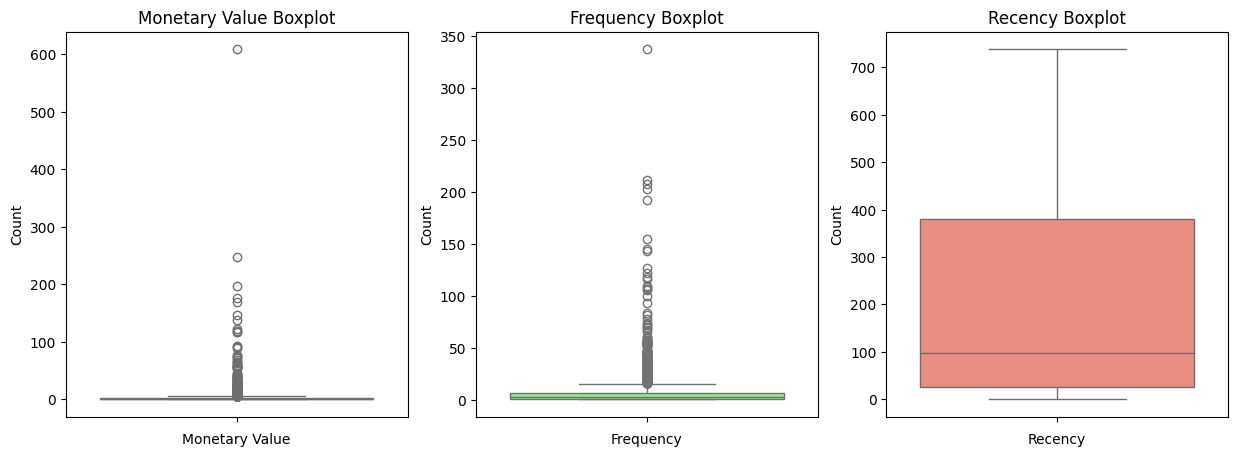

In [19]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data= aggregated_df["MonetaryValue"] / 1e3, color="skyblue")
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
sns.boxplot(data= aggregated_df["Frequency"], color="lightgreen")
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
sns.boxplot(data= aggregated_df["Recency"], color="salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency")
plt.ylabel("Count")
plt.show()

The boxplot is totally quashed in the monetary value feature and almost in the frequency feature. We don't have any outliers in the recency feature. For the sake of effective performance of our model, we are going to separate the outliers from the cleaned dataframe and put them in another dataframe. Thus, we are going to have two different dataframes, outliers dataframe and non outliers dataframe.The analysis will be ran on both dataframes separately.

**Separate outliers in both Monetary Value and Frequency Features**

In [20]:
# Removal of Monetary Value outliers
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
# Calculate interquater range for monetary Value 'M_IQR'
M_IQR = M_Q3 - M_Q1

In [21]:
# Creation of dataframe name 'monetary_outliers_df'
monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"]>(M_Q3 + 1.5 * M_IQR))|
(aggregated_df["MonetaryValue"]<(M_Q1 - 1.5 * M_IQR))].copy()

In [22]:
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,570.000000,570.000000,570.000000,570.00000
mean,15423.591228,16362.995400,25.998246,49.25614
std,1623.428578,33964.788641,28.102155,99.45603
min,12346.000000,5034.150000,1.000000,0.00000
25%,14033.250000,6374.412500,13.000000,4.00000
50%,15377.000000,8657.875000,19.000000,15.00000
75%,16832.750000,13830.082500,29.000000,46.00000
max,18260.000000,608821.650000,337.000000,691.00000


In [23]:
# Removal of Frequency outliers
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)
# Calculate interquater range for monetary Value 'M_IQR'
F_IQR = F_Q3 - F_Q1

In [24]:
# Create a dataframe name 'frequency_outliers_df'
frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"]>(F_Q3 + 1.5 * F_IQR))| 
(aggregated_df["Frequency"]<(F_Q1 - 1.5 * F_IQR))].copy()

**Statistical analysis of outliers in Frequency column**

In [25]:
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,392.000000,392.000000,392.000000,392.000000
mean,15589.275510,18747.453099,34.170918,30.303571
std,1670.166647,39595.472743,31.054014,65.419185
min,12747.000000,1820.440000,17.000000,0.000000
25%,14095.000000,6454.763250,20.000000,3.000000
50%,15608.500000,9626.860000,25.000000,9.000000
75%,17103.000000,16214.692500,35.000000,25.000000
max,18283.000000,608821.650000,337.000000,496.000000


Now that we are able to fetch out outliers in Monetary Value and Frequency features, we can get out non-outliers values from the 'aggregated_df' dataframe.

**Getting out non-outlier values from the 'aggregated_df'**

In [26]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & 
(~aggregated_df.index.isin(frequency_outliers_df.index))]

In [27]:
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,4734.000000,4734.000000,4734.00000,4734.000000
mean,15568.503802,1101.890515,3.72518,222.090621
std,1573.340494,1095.567035,3.22347,212.603428
min,12608.000000,0.000000,1.00000,0.000000
25%,14223.250000,306.645000,1.00000,33.000000
50%,15581.000000,694.125000,3.00000,140.500000
75%,16919.500000,1538.882500,5.00000,394.750000
max,18287.000000,5012.530000,16.00000,738.000000


**Plotting box plot of non-outliers dataframe**

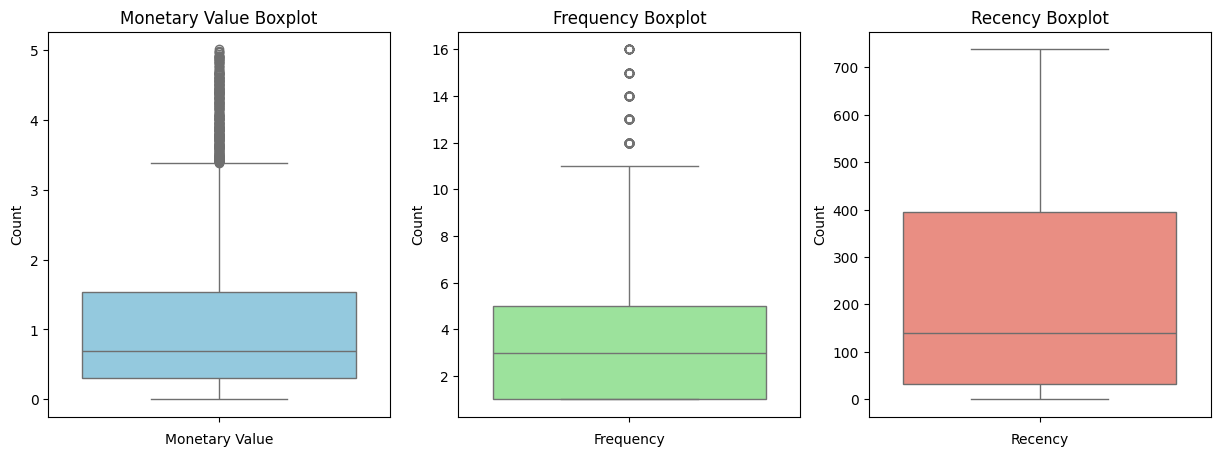

In [29]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data= non_outliers_df["MonetaryValue"] / 1e3, color="skyblue")
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
sns.boxplot(data= non_outliers_df["Frequency"], color="lightgreen")
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
sns.boxplot(data= non_outliers_df["Recency"], color="salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency")
plt.ylabel("Count")
plt.show()

**Plotting out '3 dimensional' scatter plot to show monetary values, frequency, and recency**

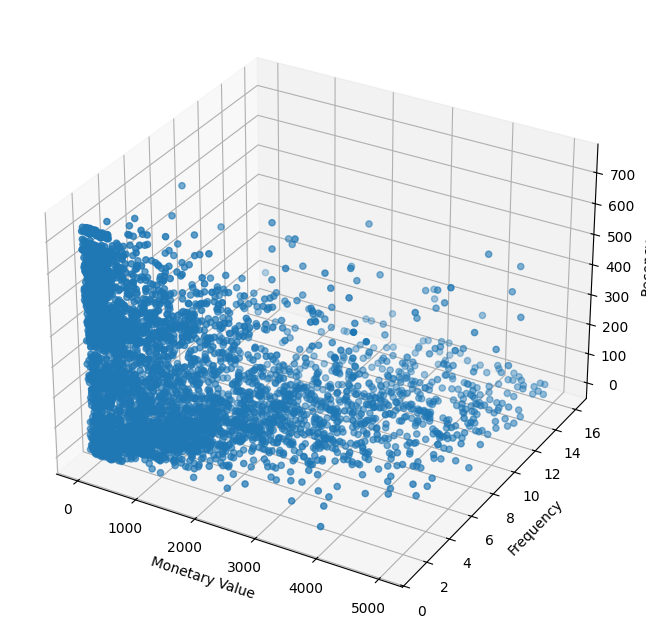

In [30]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection= "3d")
scatter = ax.scatter(non_outliers_df["MonetaryValue"],non_outliers_df["Frequency"],non_outliers_df["Recency"])
ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
plt.show()

The 3 features above are in different scales. The Monetary Values are in 'thousands', Frequency in 'tens', and the Recency feature in 'hundreds'. This will impact negatively on the kmeans model we intend to build in the sense that the placement of centroids (number of clusters) will converge more towards Monetary Value that is highly scaled among the features.   

**Scaling of Features using standard scaler**

In [31]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])
scaled_data

array([[-0.62631767, -0.84550733,  0.85571807],
       [-0.34510024, -0.53524985,  1.24145344],
       [-0.77350814, -0.84550733,  1.49547429],
       ...,
       [-0.61608444, -0.84550733,  2.05996508],
       [ 0.17758843, -0.53524985,  1.19441254],
       [ 2.81263023,  1.01603753, -0.84716247]])

**Convert the scaled_data to Dataframe**

In [32]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, 
                  columns= ["MonetaryValue", "Frequency", "Recency"])
scaled_data_df[:5]

,MonetaryValue,Frequency,Recency
1,-0.626318,-0.845507,0.855718
2,-0.345100,-0.535250,1.241453
3,-0.773508,-0.845507,1.495474
7,-0.531690,-0.845507,1.105035
8,-0.512456,-0.845507,1.105035


**The figure below shows standard scaled values of features**

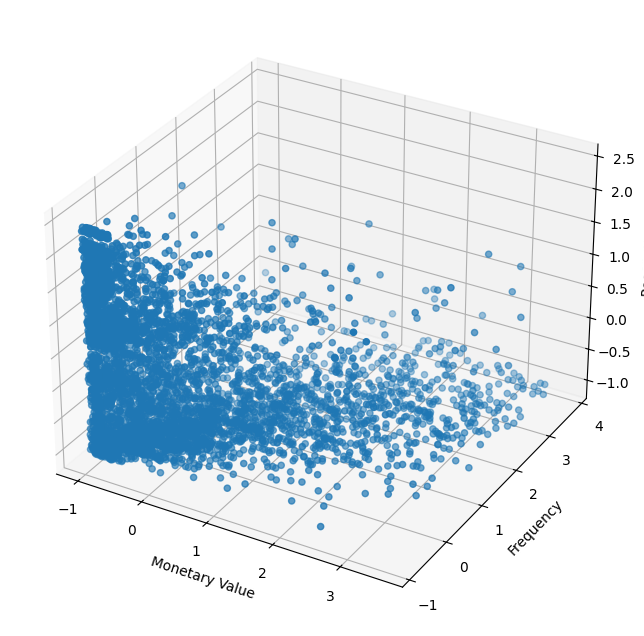

In [33]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection= "3d")
scatter = ax.scatter(scaled_data_df["MonetaryValue"],scaled_data_df["Frequency"],scaled_data_df["Recency"])
ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
plt.show()

# Buiding the Model

**Determining the appropriate number of cluster of customers the model will use**

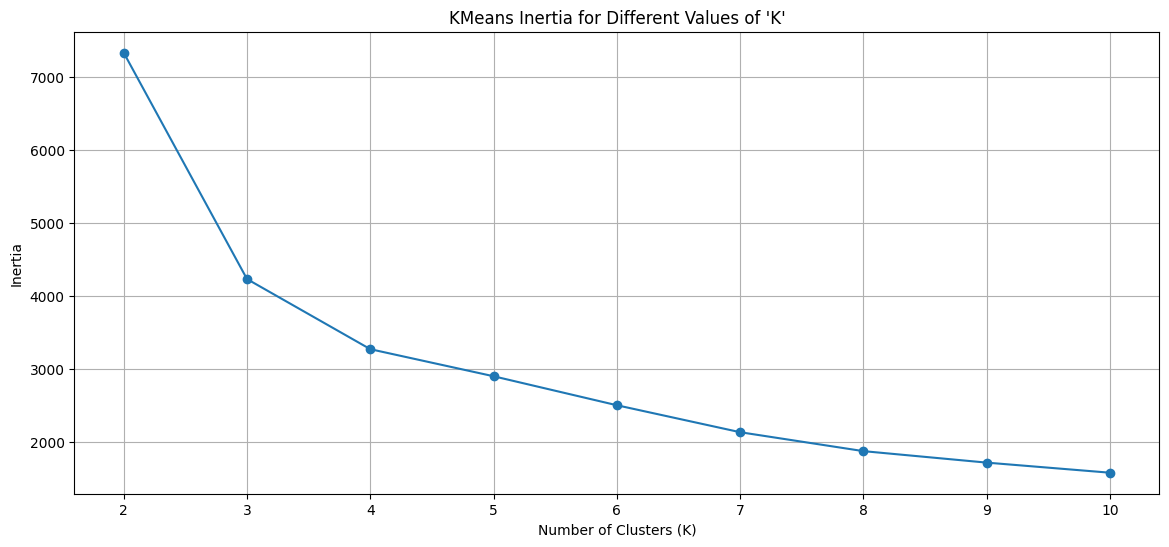

In [34]:
max_k = 10
inertia = []
k_values = range(2, max_k + 1)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans.fit_predict(scaled_data_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))
plt.plot(k_values, inertia, marker="o")
plt.title("KMeans Inertia for Different Values of 'K'")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

The above infographic shows that the number of appropriate clusters needed fall between 4 and 5 ('K'). Let use silhouette score metric to verify which of the values is best for this dataset KMeans Modeling.

**Determining the number of clusters with silhouette score metric**

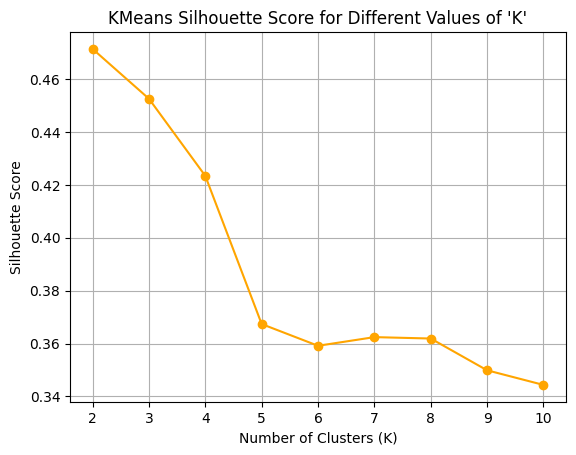

In [35]:
max_k = 10
inertia = []
ss = []
k_values = range(2, max_k + 1)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    ss.append(sil_score)
    inertia.append(kmeans.inertia_)
    
plt.plot(k_values, ss, marker="o", color = 'orange')
plt.title("KMeans Silhouette Score for Different Values of 'K'")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

From the above figure, it is obvious that the appropriate number of clusters we need for optimum performance of the kmeans model is 4 because there is significant drop of silhouette score from point 4 to point 5.

**Creation of final KMeans Model with the optimum number of cluster '4'.**

In [37]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

The above array of numbers are cluster labels that ranges from 0 to 3 (4 clusters), alotted to customer IDs in the dataset.

**Adding the cluster labels to the non_outliers_df to show the cluster each customer belong**

In [38]:
non_outliers_df["Cluster"] = cluster_labels
non_outliers_df[:5]

C:\Users\USER\AppData\Local\Temp\ipykernel_3940\1086148547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,Recency,Cluster
1,12608.0,415.79,1,404,1
2,12745.0,723.85,2,486,1
3,12746.0,254.55,1,540,1
7,12777.0,519.45,1,457,1
8,12819.0,540.52,1,457,1


**Visualization of clusters in '3 dimensional scatter plot' with distint colors for further analysis**

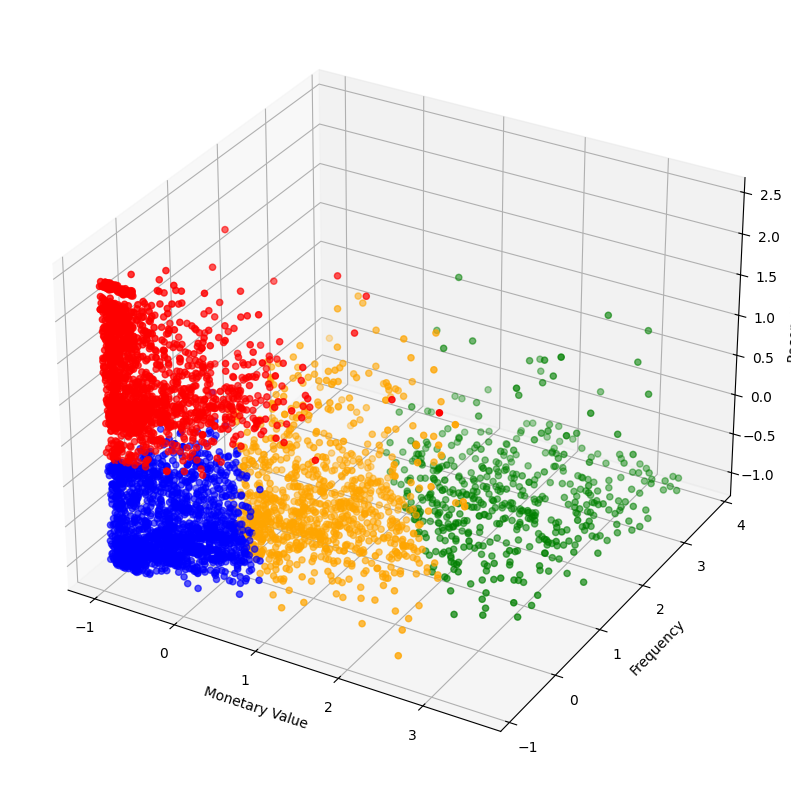

In [39]:
cluster_colors={
    0: "green",
    1: "red",
    2: "blue",
    3: "orange"
}

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection= "3d")

colors = non_outliers_df["Cluster"].map(cluster_colors)
scatter = ax.scatter(scaled_data_df["MonetaryValue"],
                     scaled_data_df["Frequency"],
                     scaled_data_df["Recency"],
                     c=colors, marker='o')
ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
plt.show()

From the above infographic;
1. Cluster '0'(Green): "**Retain**"
   This cluster represents high-valued customers who purchase regularly though not always recently. They should be    rewarded for their loyalty.
2. Cluster '1' (Red): "**Re-engage**"
   This group includes lower-valued customers infrequent buyers who haven't purchased recently. The focus should     be on re-engagement to bring them back into active purchasing behaviour.
3. Cluster '2' (Blue): "**Nurture**"
   This cluster represents the least active customers, but they have made recent purchase. Probably these            customers are new and need nurturing with the aid of promotion to increase their patronage.
4. Cluster '3' (Orange): "**Reward**"
   This cluster includes high-valued and frequent customers, many of whom are still actively purchasing. They are    the most loyal customers, and rewarding their loyalty is encouraged for maintaining them.

Now let's look into the monetary value and the frequency outliers we separated up above. There are overlappings between some of the monetary value and frequency outliers. We need to sort this by separating outliers that are not overlapping from those that are overlapping. 

**Separating overlapping points from non-overlapping points**

In [40]:
overlap_points = monetary_outliers_df.index.intersection(frequency_outliers_df.index)
overlap_points

Index([   4,    5,   12,   24,   28,   30,   32,   85,  105,  115,
       ...
       5209, 5237, 5263, 5288, 5290, 5291, 5294, 5296, 5310, 5325],
      dtype='int64', length=343)

The above result shows index where **Monetary Value outliers** intersect **Frequency Outliers**. Now, we are going to separate points where we have **only monetary value** and **only frequency outliers** from  the **overlapping outliers**.

In [48]:
monetary_only_outliers = monetary_outliers_df.drop(overlap_points)
monetary_only_outliers[:5]

,Customer ID,MonetaryValue,Frequency,Recency
0,12346.0,77556.46,12,325
6,12749.0,6897.36,9,3
19,12830.0,6814.64,6,37
25,12836.0,6585.62,15,58
54,12867.0,7913.29,13,25


In [49]:
frequency_only_outliers = frequency_outliers_df.drop(overlap_points)
frequency_only_outliers[:5]

,Customer ID,MonetaryValue,Frequency,Recency
62,12877.0,2955.17,20,3
204,13021.0,4887.24,17,3
297,13117.0,2643.81,18,21
663,13491.0,4566.56,27,51
708,13542.0,4006.17,17,376


In [50]:
monetary_and_frequency_outliers = frequency_outliers_df.loc[overlap_points]
monetary_and_frequency_outliers[:5]

,Customer ID,MonetaryValue,Frequency,Recency
4,12747.0,9276.54,26,1
5,12748.0,56599.39,337,0
12,12823.0,6501.50,18,74
24,12835.0,6043.31,41,427
28,12839.0,10071.73,26,2


The above results show 3 dataframes from only monetary value outliers and only frequency outliers that do not overlap, and the third dataframe shows the observations in the overlapping points. We are going to combine the 3 outliers dataframes into a single dataframe with method known as concatenation. 

**But before that, let manually assign cluster labels to only monetary value outliers, only frequency outliers, and overlapping points in the "Cluster" column up above. The value will be negative to differentiate it from non-outliers cluster labels generated through kmeans model.** 

In [52]:
monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

**Combining dataframes into a single dataframe**

In [53]:
outliers_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])
outliers_clusters_df[:5]

,Customer ID,MonetaryValue,Frequency,Recency,Cluster
0,12346.0,77556.46,12,325,-1
6,12749.0,6897.36,9,3,-1
19,12830.0,6814.64,6,37,-1
25,12836.0,6585.62,15,58,-1
54,12867.0,7913.29,13,25,-1


**With Violin Plot, let's show the distribution of dataset in 'outliers_clusters_df' with respect to Monetary Value, Frequency, and Recency** 

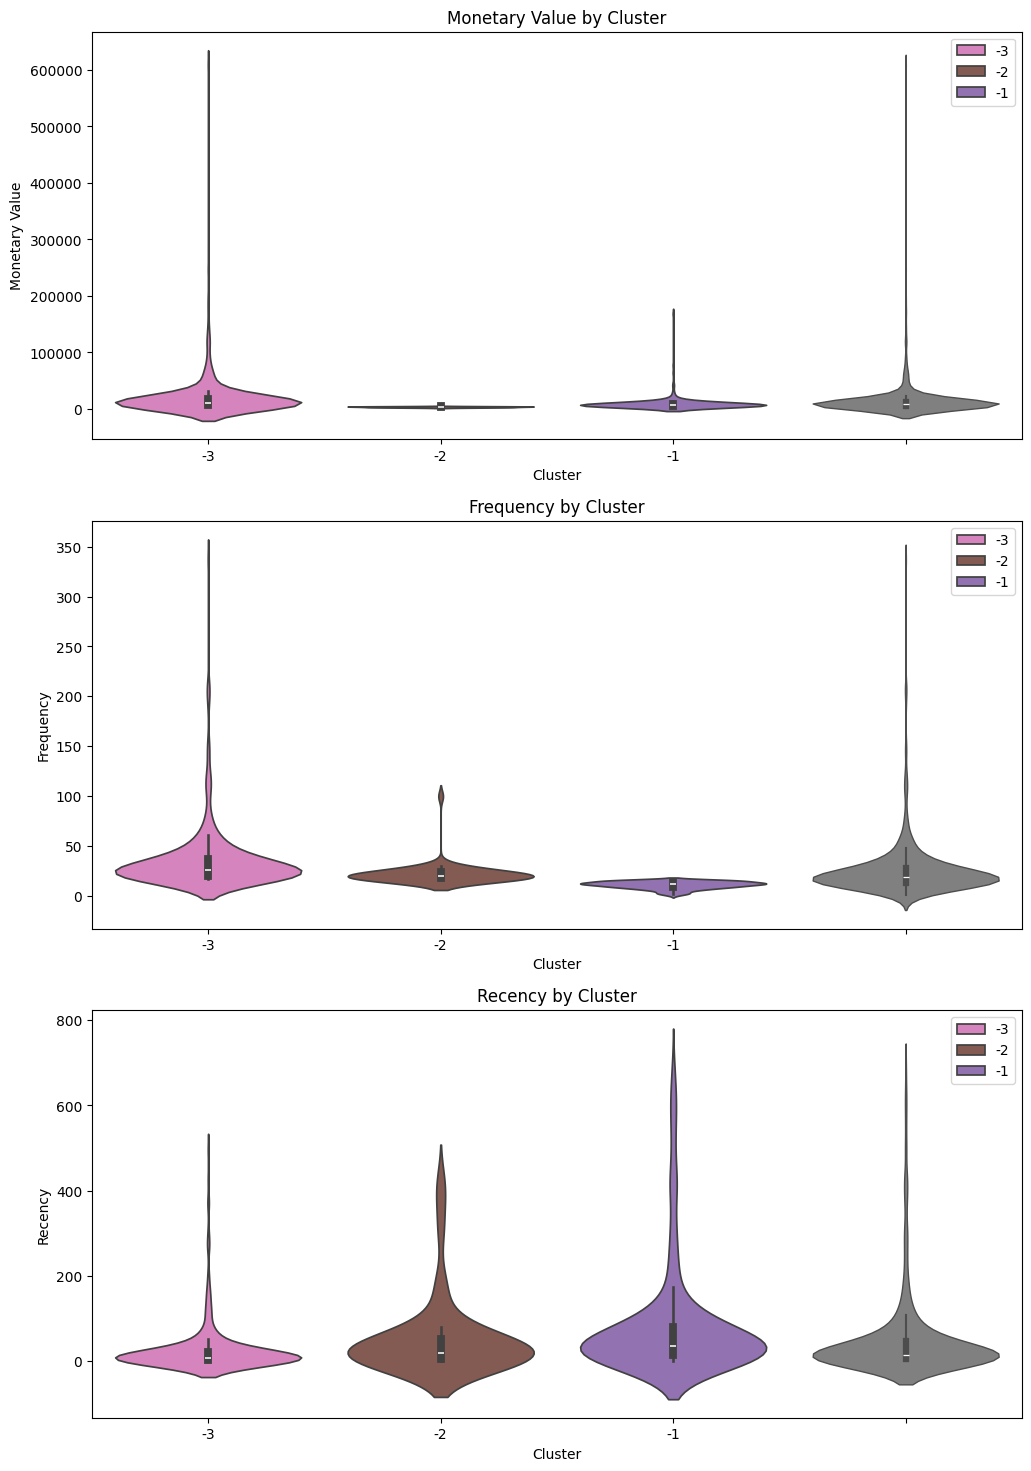

In [54]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outliers_clusters_df["Cluster"], y=outliers_clusters_df["MonetaryValue"], 
               palette= cluster_colors, hue=outliers_clusters_df["Cluster"])
sns.violinplot(y=outliers_clusters_df['MonetaryValue'], color="gray", linewidth=1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")

plt.subplot(3, 1, 2)
sns.violinplot(x=outliers_clusters_df["Cluster"], y=outliers_clusters_df["Frequency"], 
               palette= cluster_colors, hue=outliers_clusters_df["Cluster"])
sns.violinplot(y=outliers_clusters_df['Frequency'], color="gray", linewidth=1.0)
plt.title("Frequency by Cluster")
plt.ylabel("Frequency")

plt.subplot(3, 1, 3)
sns.violinplot(x=outliers_clusters_df["Cluster"], y=outliers_clusters_df["Recency"], 
               palette= cluster_colors, hue=outliers_clusters_df["Cluster"])
sns.violinplot(y=outliers_clusters_df['Recency'], color="gray", linewidth=1.0)
plt.title("Recency by Cluster")
plt.ylabel("Recency");

**Insights from the violin plot up above**;

1. Cluster label '-1' (**Pamper**): Actually observations from our outliers dataset are very small compare to the non-outliers. So, customers that fall in the '-1'cluster are high spenders with low rate of patronage.

2. Cluster label '-2' (**Persuade**): Customers in '-2' cluster have very low spending rate, some of whom are frequent buyers and have recently patronized the business. This kind of customers need to be persuaded with mouth watering offers to buy more and consequently increase their loyalty in the business.

3. Cluster label '-3' (**Delight**): Customers in '-3' cluster definitely spend more than customers in '-1' and '2' clusters. They are more frequent buyers and majority of this customers recently patronize the business. This group of customers are some of the most valued customers of the organization. Therefore, they should be handled with utmost respect.   

Now that we have our outliers in a single dataframe, let's combine it with the non-outliers dataframe that we worked on above.

**Combining outliers and non-outliers dataframes together**

In [55]:
full_clustering_df = pd.concat([outliers_clusters_df, non_outliers_df])
full_clustering_df[:5]

,Customer ID,MonetaryValue,Frequency,Recency,Cluster
0,12346.0,77556.46,12,325,-1
6,12749.0,6897.36,9,3,-1
19,12830.0,6814.64,6,37,-1
25,12836.0,6585.62,15,58,-1
54,12867.0,7913.29,13,25,-1


We have successfully divided our customers into clusters with different numerical labels, and each cluster is tag with recommendable action name. Let's map each numerical cluster label with their respective action name. 

**Mapping numerical labels with their respective action name**

In [56]:
cluster_labels = {
    0: 'Retain',
    1: 'Re-engage',
    2: 'Nurture',
    3: 'Reward',
    -1: 'Pamper',
    -2: 'Persuade',
    -3: 'Delight'
}

full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)
full_clustering_df[:5]

,Customer ID,MonetaryValue,Frequency,Recency,Cluster,ClusterLabel
0,12346.0,77556.46,12,325,-1,Pamper
6,12749.0,6897.36,9,3,-1,Pamper
19,12830.0,6814.64,6,37,-1,Pamper
25,12836.0,6585.62,15,58,-1,Pamper
54,12867.0,7913.29,13,25,-1,Pamper


# Communication

**Let's rap all of the above findings into a single visualization**

In [57]:
# Counting aggregation of each cluster label

cluster_count = full_clustering_df["ClusterLabel"].value_counts()
cluster_count

ClusterLabel
Nurture      1701
Re-engage    1544
Reward        993
Retain        496
Delight       343
Pamper        227
Persuade       49
Name: count, dtype: int64

In [58]:
# Grouping average values of each feature by their respective cluster label
full_clustering_df["MonetaryValue per 10 pounds"] = full_clustering_df["MonetaryValue"] / 10
feature_means = full_clustering_df.groupby("ClusterLabel")[["Frequency", "Recency", "MonetaryValue per 10 pounds"]].mean()
feature_means

,Frequency,Recency,MonetaryValue per 10 pounds
ClusterLabel,,,
Delight,35.868805,27.072886,2090.119876
Nurture,2.230453,97.012346,56.768375
Pamper,11.083700,82.775330,950.571015
Persuade,22.285714,52.918367,367.123347
Re-engage,1.738342,486.902850,46.734630
Retain,10.622984,58.477823,347.240607
Reward,5.929507,106.320242,181.956047


**Creating bar and line chart of Average Monetary Value, frequency, and Recency alongside number of customer** 

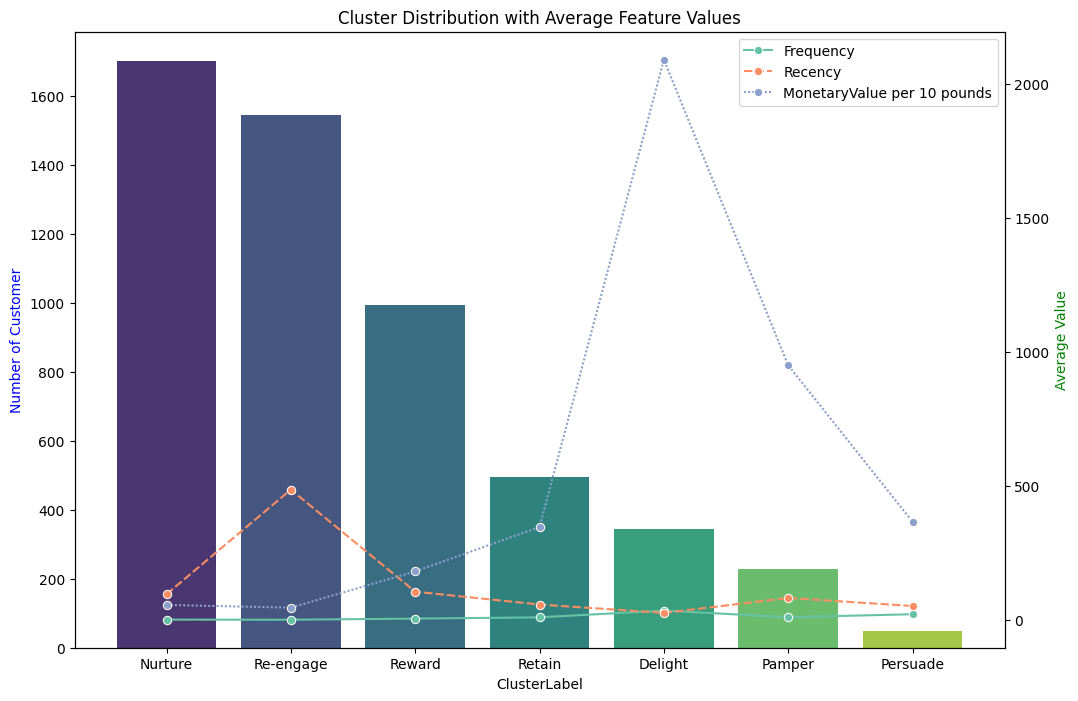

In [59]:
fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_count.index, y=cluster_count.values, ax=ax1,  palette="viridis", hue=cluster_count.index)
ax1.set_ylabel('Number of Customer', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()
sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()

Summary

The majority of our customers fall in the 'Nurture' cluster and their spending rate is very low. Extra work needs to be done to gain their loyalty. Customers in the 'Reward', 'Retain', 'Pamper' and 'Delight' clusters are the best performers. They should be properly taken care of, to keep their patronage behaviour. While the last group in the clusters are those that need to be persuaded to increase their spending rate. They belong to 'Re-engage' and 'persuade' clusters. 